### Open an Italian Restaurant in Manhattan

### Introduction/Business Problem

Manhattan is the most densely populated of the five boroughs of New York City. Manhattan serves as the city's economic and administrative center. The borough consists mostly of Manhattan Island, bounded by the Hudson, East, and Harlem rivers; as well as several small adjacent islands. Manhattan has been described as the cultural, financial, media, and entertainment capital of the world and thousands of people work in the offices of Manhattan every day. 
The Italian cousin is one of the most appreciate cousin in the world. This is due to its tasty and simplicity but also to the quality of the ingredients and to the great variety of dishes. 
In this project we will analyze which is the best neighborhood of Manhattan where to open an Italian restaurant. The project is addressed to business people that want to exploit the great amount of people in Manhattan that will for sure be attracted from the Italian cousin. 
To select the best neighborhood, we will extract the number of Italian Restaurant in each neighborhood of Manhattan in order to select the neighborhood with few Italian Restaurant already present. Moreover, we will choose the most “central” neighborhood that in this way will be easy to reach from every point of Manhattan.


### Data
I will use the New York City dataset that contains Borough, Neighborhoods, Latitudes and Longitudes information. Data were downloaded trough a .csv file from https://data.cityofnewyork.us From this dataset the neighborhood of Manhattan will be extracted. 
With the Foursquare API I will get all the venues in Manhattan neighborhood. I will then filter these venues to get only Italian restaurants. With the Italian restaurant dataset I will analyze the best value of k to perform a clustering analysis to extract the cluster of neighborhood with less Italian restaurant. At the end, from this  neighborhood I will select the one closest to the center of Manhattan. 


### Data preparation and methodology

In [1]:
# import pandas libriary
import pandas as pd

In [2]:
# import .csv file of New York data and convert it to Pandas Dataframe
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']
df= pd.read_csv("C:/Coursera/NYD.csv", header = None, names = column_names)
df

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
...,...,...,...,...
294,Staten Island,Lighthouse Hill,40.576506,-74.137927
295,Staten Island,Richmond Valley,40.519541,-74.229571
296,Queens,Malba,40.790602,-73.826678
297,Brooklyn,Highland Park,40.682486,-73.890281


In [3]:
# import other libraries that will be use during the project

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Foursquare
I will use Forsquare to extract the venues of the manhattan Neighborhood

In [11]:
# define Foursquare client data
import requests
CLIENT_ID = 'BHZDTE1FXGGUYFSCMGFFRVWCJR2W2DF1R4MA2XX2P4PQC4Q3'
CLIENT_SECRET = '1VKS0XI3UTC4SAIA0ZNNIVGHUUSNDJ0FK4F1G1XE3SCRCK1H'

In [12]:
# defining radius and limit of venues to get
radius=500
LIMIT=100
VERSION= 20170611

In [13]:
# from the New York data dataframe extract only the neighborhood of Manhattan
manhattan_data = df[df['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [14]:
# Extract Manhattan coordinates
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [15]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [16]:
# define function to extract Manhattan venues
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
# create dataframe with manhattan venues
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron


In [18]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3075, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


In [19]:
# group manhattan venues dataframe by neighborhood
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,65,65,65,65,65,65
Carnegie Hill,87,87,87,87,87,87
Central Harlem,45,45,45,45,45,45
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,99,99,99,99,99,99
Clinton,100,100,100,100,100,100
East Harlem,40,40,40,40,40,40
East Village,100,100,100,100,100,100


In [20]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 331 uniques categories.


In [21]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# calculate the mean venues for eahc neighborhood
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Battery Park City,0.000000,0.00,0.00,0.000000,0.015385,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.015385,0.000000,0.000000,0.000000
1,Carnegie Hill,0.000000,0.00,0.00,0.000000,0.011494,0.000000,0.000000,0.000000,0.011494,...,0.00,0.022989,0.000000,0.000000,0.000000,0.011494,0.034483,0.000000,0.000000,0.034483
2,Central Harlem,0.000000,0.00,0.00,0.066667,0.044444,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Chelsea,0.000000,0.00,0.00,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.000000
4,Chinatown,0.000000,0.00,0.00,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
5,Civic Center,0.000000,0.00,0.00,0.000000,0.040404,0.010101,0.000000,0.000000,0.000000,...,0.00,0.010101,0.000000,0.000000,0.010101,0.010101,0.010101,0.010101,0.000000,0.020202
6,Clinton,0.000000,0.00,0.00,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.030000,0.000000,0.000000,0.000000
7,East Harlem,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,East Village,0.000000,0.00,0.00,0.000000,0.010000,0.000000,0.000000,0.010000,0.010000,...,0.00,0.020000,0.000000,0.000000,0.000000,0.030000,0.010000,0.000000,0.000000,0.000000
9,Financial District,0.000000,0.00,0.00,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.010000,0.010000


In [23]:
# create a dataframe that contains only the mean of Italian Restaurant for each neighborhood
Italian_manhattan = manhattan_grouped[['Neighborhood','Italian Restaurant']]
Italian_manhattan

,Neighborhood,Italian Restaurant
0,Battery Park City,0.015385
1,Carnegie Hill,0.034483
2,Central Harlem,0.000000
3,Chelsea,0.020000
4,Chinatown,0.010000
5,Civic Center,0.010101
6,Clinton,0.050000
7,East Harlem,0.000000
8,East Village,0.020000
9,Financial District,0.040000


In [24]:
#extract italian restaurant from the above dataframe to calculate best value of k
Italian_restaurant = Italian_manhattan['Italian Restaurant']
Italian_restaurant

0     0.015385
1     0.034483
2     0.000000
3     0.020000
4     0.010000
5     0.010101
6     0.050000
7     0.000000
8     0.020000
9     0.040000
10    0.040000
11    0.036585
12    0.100000
13    0.016393
14    0.000000
15    0.050000
16    0.051020
17    0.040000
18    0.021277
19    0.025000
20    0.042553
21    0.000000
22    0.000000
23    0.010000
24    0.000000
25    0.011765
26    0.040000
27    0.000000
28    0.083333
29    0.000000
30    0.040000
31    0.053333
32    0.013333
33    0.050000
34    0.078652
35    0.048780
36    0.011364
37    0.070000
38    0.060000
Name: Italian Restaurant, dtype: float64

In [25]:
# reshape the dataframe 
b=Italian_restaurant.values.reshape(-1,1)
b

array([[0.01538462],
       [0.03448276],
       [0.        ],
       [0.02      ],
       [0.01      ],
       [0.01010101],
       [0.05      ],
       [0.        ],
       [0.02      ],
       [0.04      ],
       [0.04      ],
       [0.03658537],
       [0.1       ],
       [0.01639344],
       [0.        ],
       [0.05      ],
       [0.05102041],
       [0.04      ],
       [0.0212766 ],
       [0.025     ],
       [0.04255319],
       [0.        ],
       [0.        ],
       [0.01      ],
       [0.        ],
       [0.01176471],
       [0.04      ],
       [0.        ],
       [0.08333333],
       [0.        ],
       [0.04      ],
       [0.05333333],
       [0.01333333],
       [0.05      ],
       [0.07865169],
       [0.04878049],
       [0.01136364],
       [0.07      ],
       [0.06      ]])

In [26]:
# calculate the best value of k
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(b)
    Sum_of_squared_distances.append(km.inertia_)

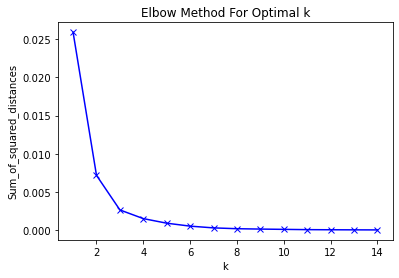

In [27]:
# plot the k graph to use the elbow method
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Following the elbow method the best alue of k is 3

In [28]:
# set number of clusters
kclusters = 3
manhattan_grouped_clustering = Italian_manhattan.drop('Neighborhood', 1)
manhattan_grouped_clustering


,Italian Restaurant
0,0.015385
1,0.034483
2,0.000000
3,0.020000
4,0.010000
5,0.010101
6,0.050000
7,0.000000
8,0.020000
9,0.040000


In [29]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [31]:
# add clustering labels
Italian_manhattan.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = Italian_manhattan

# merge manhattan merged with New york data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(df.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Cluster Labels,Neighborhood,Italian Restaurant,Borough,Latitude,Longitude
0,1,Battery Park City,0.015385,Manhattan,40.711932,-74.016869
1,0,Carnegie Hill,0.034483,Manhattan,40.782683,-73.953256
2,1,Central Harlem,0.000000,Manhattan,40.815976,-73.943211
3,1,Chelsea,0.020000,Manhattan,40.744035,-74.003116
3,1,Chelsea,0.020000,Staten Island,40.594726,-74.189560


In [32]:
manhattan_merged

,Cluster Labels,Neighborhood,Italian Restaurant,Borough,Latitude,Longitude
0,1,Battery Park City,0.015385,Manhattan,40.711932,-74.016869
1,0,Carnegie Hill,0.034483,Manhattan,40.782683,-73.953256
2,1,Central Harlem,0.000000,Manhattan,40.815976,-73.943211
3,1,Chelsea,0.020000,Manhattan,40.744035,-74.003116
3,1,Chelsea,0.020000,Staten Island,40.594726,-74.189560
4,1,Chinatown,0.010000,Manhattan,40.715618,-73.994279
5,1,Civic Center,0.010101,Manhattan,40.715229,-74.005415
6,0,Clinton,0.050000,Manhattan,40.758334,-73.996408
7,1,East Harlem,0.000000,Manhattan,40.792249,-73.944182
8,1,East Village,0.020000,Manhattan,40.727847,-73.982226


In [35]:
# visualzie clusters on a map
import numpy as np
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster -1],
        fill=True,
        #fill_color=rainbow[cluster -1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Explore clusters

In [41]:
cluster_0 = manhattan_merged.loc[manhattan_merged['Cluster Labels']== 0]
cluster_0

,Cluster Labels,Neighborhood,Italian Restaurant,Borough,Latitude,Longitude
1,0,Carnegie Hill,0.034483,Manhattan,40.782683,-73.953256
6,0,Clinton,0.050000,Manhattan,40.758334,-73.996408
9,0,Financial District,0.040000,Manhattan,40.707107,-74.010665
10,0,Flatiron,0.040000,Manhattan,40.739673,-73.990947
11,0,Gramercy,0.036585,Manhattan,40.737210,-73.981376
15,0,Lenox Hill,0.050000,Manhattan,40.768113,-73.958860
16,0,Lincoln Square,0.051020,Manhattan,40.773529,-73.985338
17,0,Little Italy,0.040000,Manhattan,40.719324,-73.997305
20,0,Manhattanville,0.042553,Manhattan,40.816934,-73.957385
26,0,Noho,0.040000,Manhattan,40.723259,-73.988434


In [42]:
cluster_1=manhattan_merged.loc[manhattan_merged['Cluster Labels']== 1]
cluster_1

,Cluster Labels,Neighborhood,Italian Restaurant,Borough,Latitude,Longitude
0,1,Battery Park City,0.015385,Manhattan,40.711932,-74.016869
2,1,Central Harlem,0.000000,Manhattan,40.815976,-73.943211
3,1,Chelsea,0.020000,Manhattan,40.744035,-74.003116
3,1,Chelsea,0.020000,Staten Island,40.594726,-74.189560
4,1,Chinatown,0.010000,Manhattan,40.715618,-73.994279
5,1,Civic Center,0.010101,Manhattan,40.715229,-74.005415
7,1,East Harlem,0.000000,Manhattan,40.792249,-73.944182
8,1,East Village,0.020000,Manhattan,40.727847,-73.982226
13,1,Hamilton Heights,0.016393,Manhattan,40.823604,-73.949688
14,1,Inwood,0.000000,Manhattan,40.867684,-73.921210


In [43]:
cluster_2= manhattan_merged.loc[manhattan_merged['Cluster Labels']== 2]
cluster_2

,Cluster Labels,Neighborhood,Italian Restaurant,Borough,Latitude,Longitude
12,2,Greenwich Village,0.100000,Manhattan,40.726933,-73.999914
28,2,Soho,0.083333,Manhattan,40.722184,-74.000657
34,2,Upper East Side,0.078652,Manhattan,40.775639,-73.960508
37,2,West Village,0.070000,Manhattan,40.734434,-74.006180


In [44]:
cluster_1_selected = cluster_1[['Neighborhood','Italian Restaurant']]
cluster_1_selected

,Neighborhood,Italian Restaurant
0,Battery Park City,0.015385
2,Central Harlem,0.000000
3,Chelsea,0.020000
3,Chelsea,0.020000
4,Chinatown,0.010000
5,Civic Center,0.010101
7,East Harlem,0.000000
8,East Village,0.020000
13,Hamilton Heights,0.016393
14,Inwood,0.000000


In [46]:
graph = cluster_1_selected.sort_values(by='Italian Restaurant', ascending = False)
graph

,Neighborhood,Italian Restaurant
19,Manhattan Valley,0.025000
18,Lower East Side,0.021277
8,East Village,0.020000
3,Chelsea,0.020000
3,Chelsea,0.020000
13,Hamilton Heights,0.016393
0,Battery Park City,0.015385
32,Tudor City,0.013333
25,Murray Hill,0.011765
25,Murray Hill,0.011765


### From the cluster analysis we see that cluster 0 contains neighborhood with intermidiate number of Italian restaurant, cluster 1 nighborhood with low number of restaurants and cluster 2 neighborhood with high number of Italian restaurants
### For this reason we select cluster number 1 and we plot it in a bar graph to visualize nighborhoods of this cluster with less  Italian restaurant

Text(0.5, 0, 'Neighborhood')

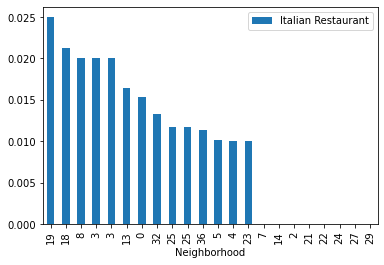

In [48]:
# create bar graph
graph.plot(kind = 'bar')
plt.xlabel('Neighborhood')

### Results 
The result of the analysis show that the neighborhoods in Manhattan with less Italian restaurant are: East Harlem, Inwood, Central Harlem, Marble Hill, Midtown, Morningsite Heights, Rooswel Islands, Stuyvesant Town and Rooswelt Island.


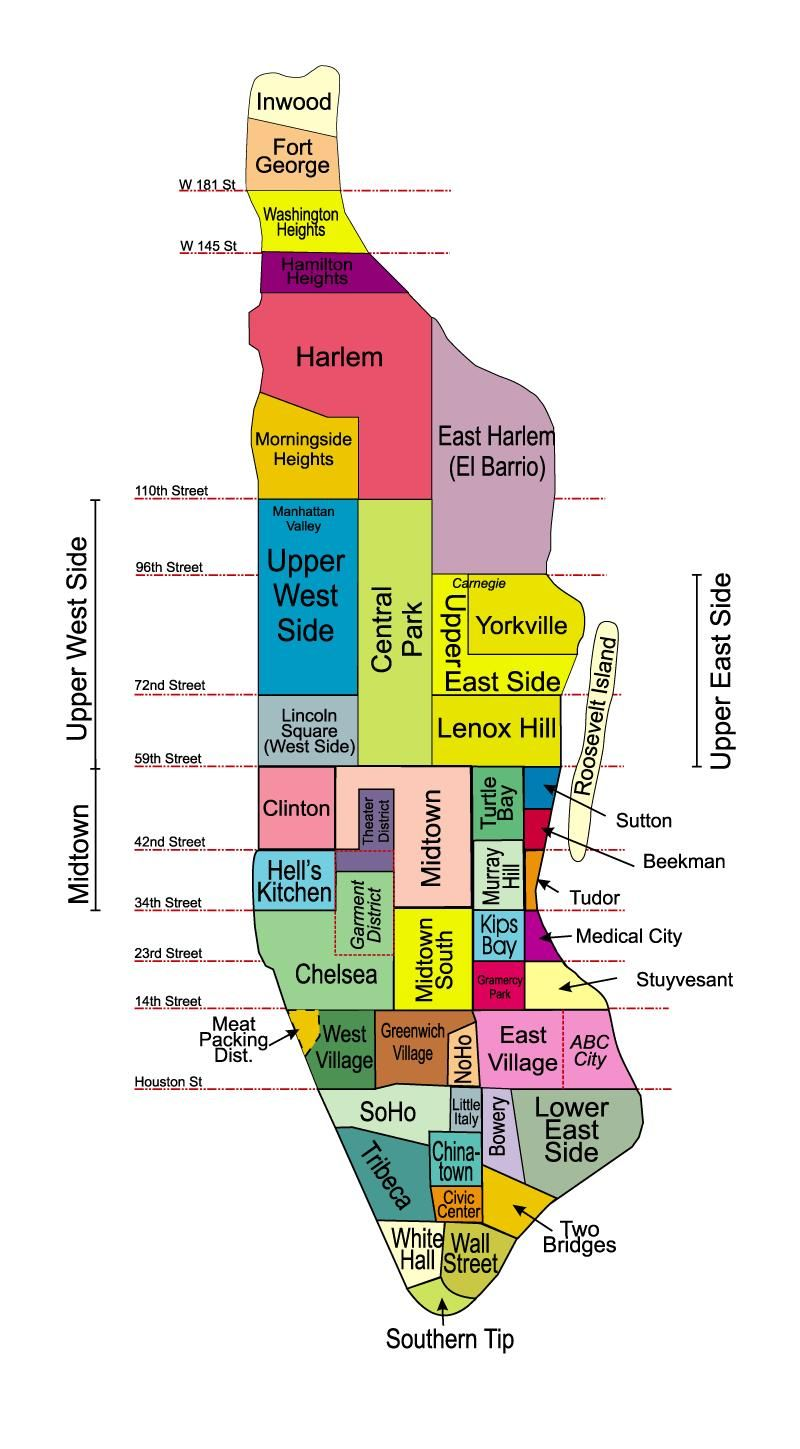

In [10]:
from IPython.display import Image
PATH = "C:/Users/matti/Desktop/Coursera_Capstone-master/n.jpg"
Image(filename = PATH , width=600, height=600)

If we look at the map above we see that from the selected neighborhood the Midtown Neighborhood is the more central one and more easy to reach from every poin of Manahattan. It woul be good to open an Italian Restaurant there

## Discussion

According to the results, Midtown will provide the best place to open an Italian restaurant in Manhattan.
Indeed in this neighborhood there are no Italian Restaurants ath the moment so no competition is expected
and moreover it is in the middle of Manhattan, so easy to reach from every point.
Howver, even if with this analysis we have a general idea of the best place to open an Italian Restaurant in Manhattan, I think that more analysis are required since also land price or distance from station could a major role.


## Conclusion
In this project we analyzed the best nighborhood in Manhattan where to open an Italian Restaurant. The analysis was carry out combining several python libriaries, clustering analsysis and Foursquare data. We found that Midtown coul be a good palce where to opena new Italian Restaurant. 